### Attributes of mushroom classification from https://archive.ics.uci.edu/ml/datasets/mushroom
Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import randn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [171]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv")

In [172]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


 All the data are in the form of labels or category. In order to analyse the data we need to convert the data to numerical values

In [173]:
df.shape

(8124, 23)

In [174]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

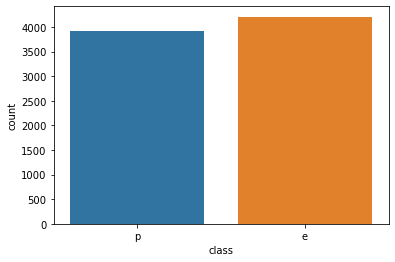

In [175]:
sns.countplot(df['class'])
plt.show()

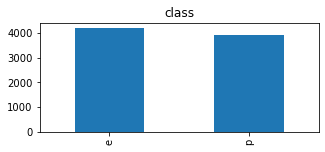

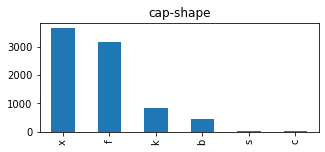

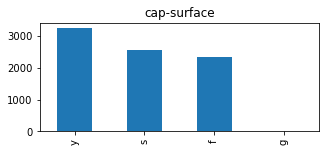

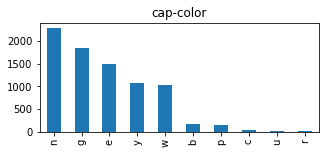

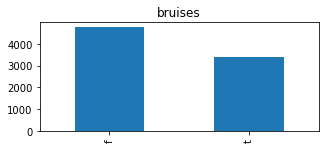

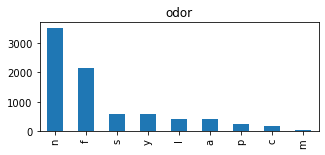

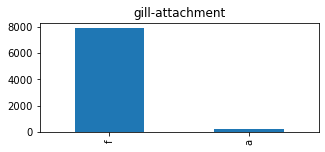

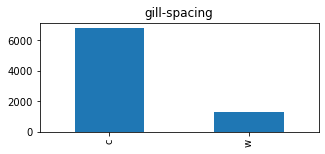

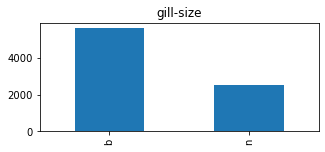

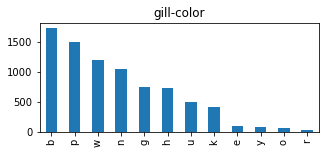

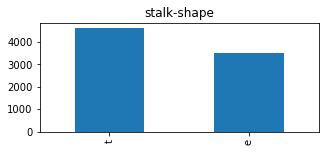

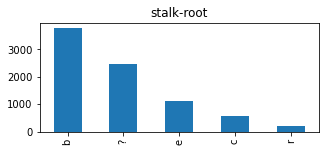

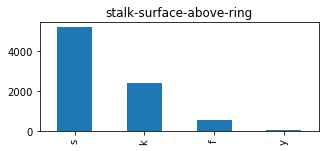

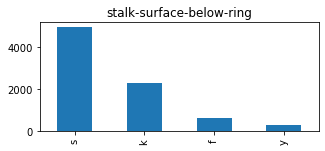

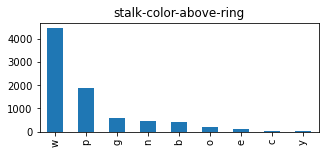

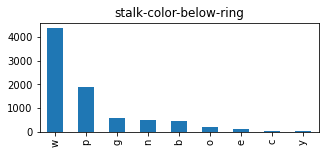

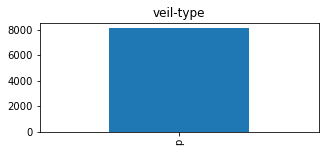

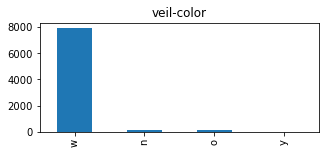

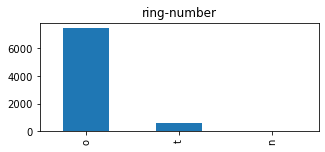

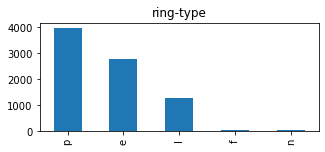

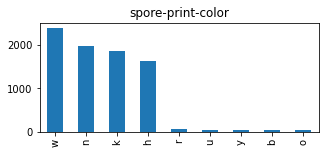

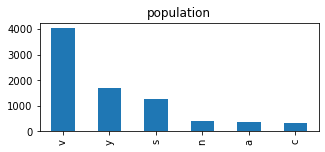

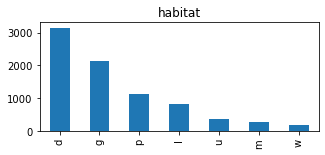

In [176]:
#visualize categorical features

categorical = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
for i in categorical:
    df[i].value_counts().plot(kind='bar' ,figsize = (5, 2),title=i)
    plt.show()

# Since, those are categorical data and the dataset is not very huge, so not dropping any columns

In [177]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

There is no class imbalance.

In [178]:
le = LabelEncoder()
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


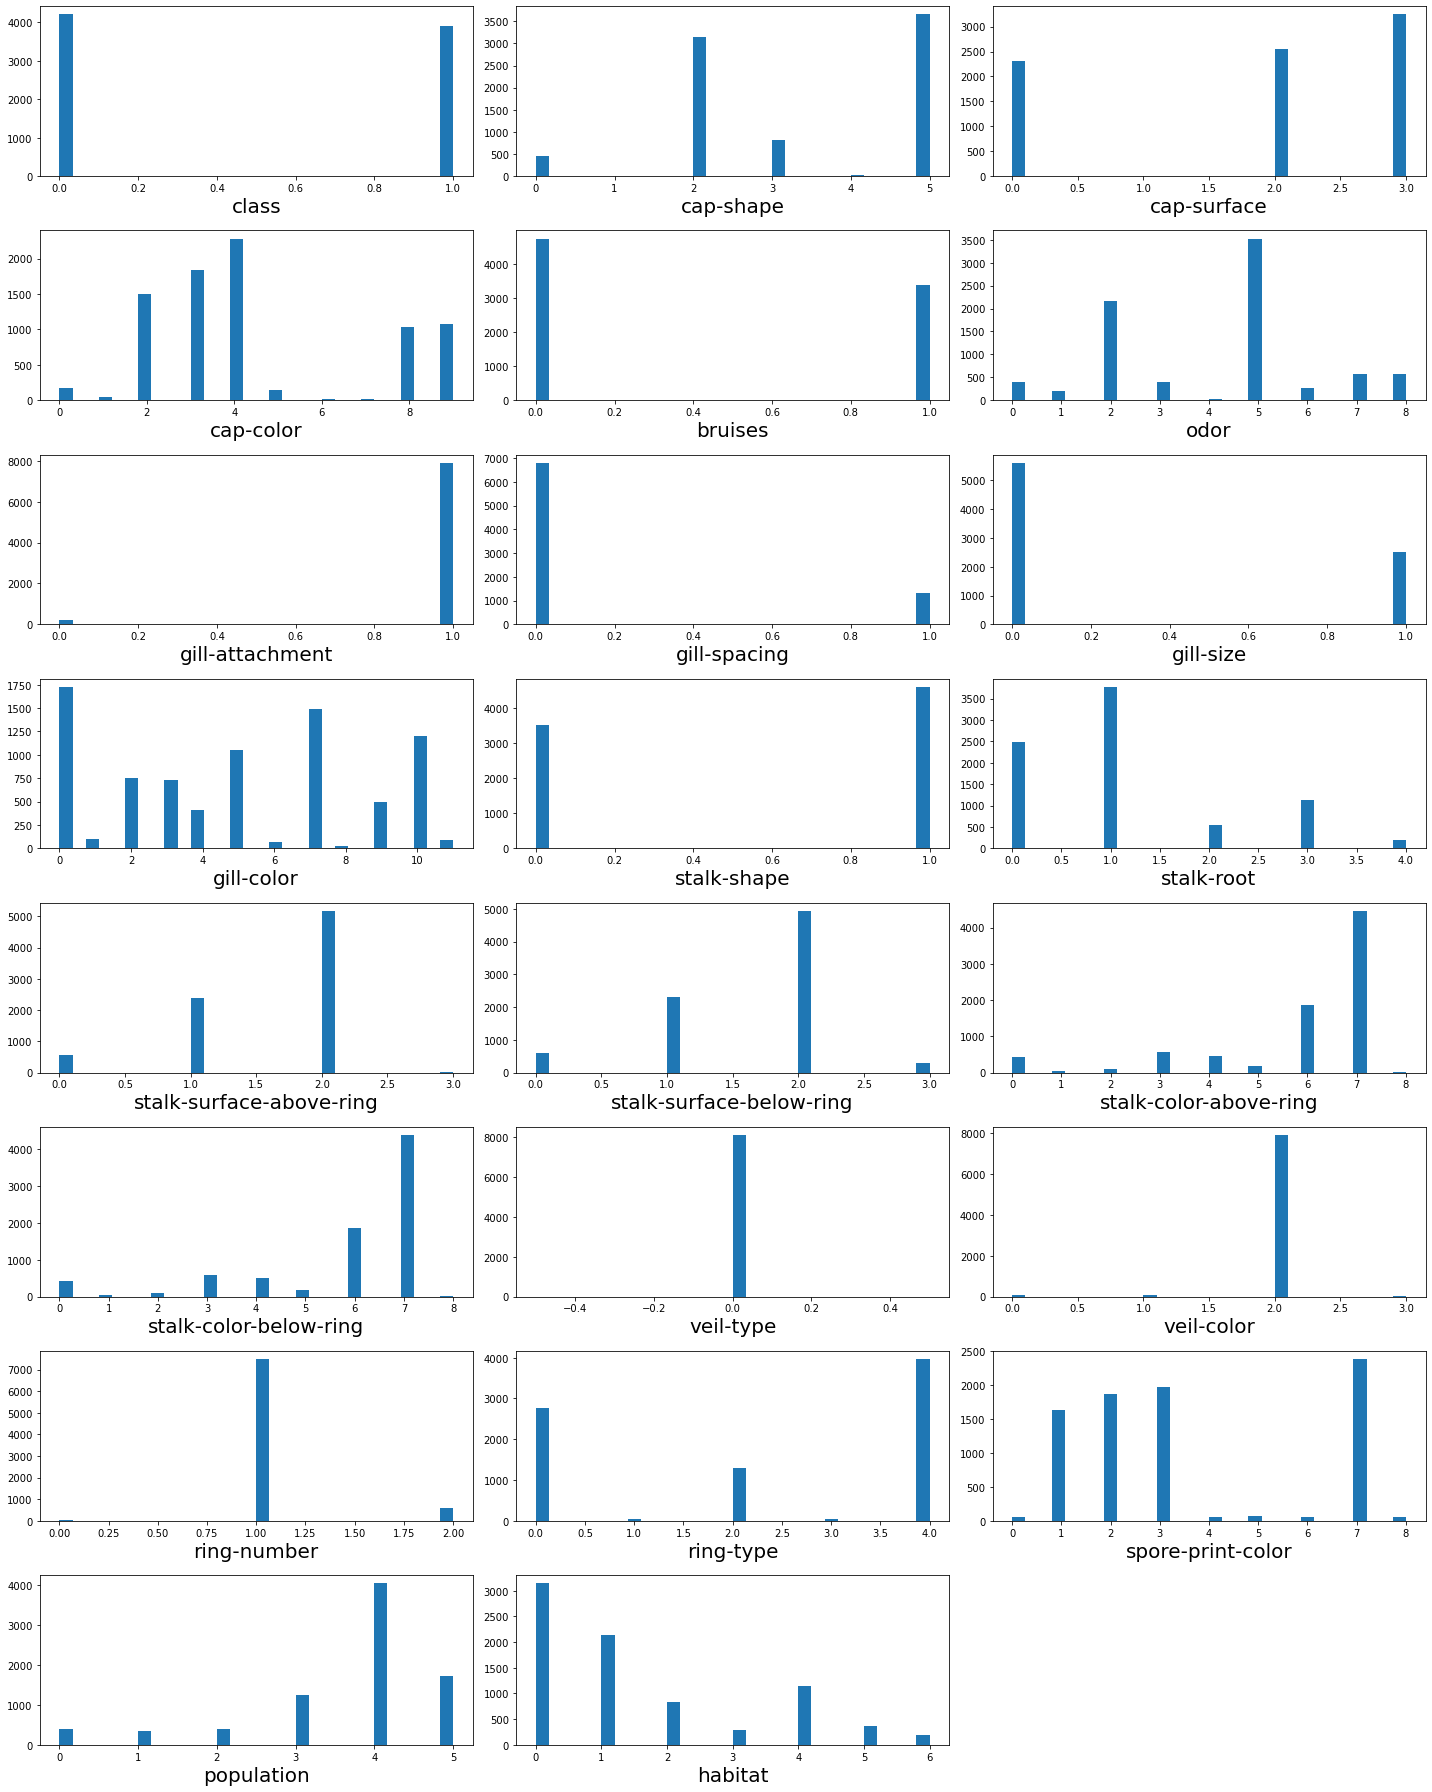

In [179]:
plt.figure(figsize = (20,25), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber<=24:
       ax = plt.subplot(8,3, plotnumber)
       plt.hist(df[column], bins=30)
       plt.xlabel(column,fontsize = 20)
       
    plotnumber += 1
    
plt.tight_layout()

Since the dataset consists of only categorical data, so outliers and skewness need not be treated.
Also, veil-type column has only zeros in it. So,should be deleted.

In [180]:
df=df.drop(['veil-type'], axis = 1)

In [181]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [90]:
y = df['class']
x = df.drop(columns = ['class'])

In [92]:
df.dtypes

class                       int64
cap-shape                   int64
cap-surface                 int64
cap-color                   int64
bruises                     int64
odor                        int64
gill-attachment             int64
gill-spacing                int64
gill-size                   int64
gill-color                  int64
stalk-shape                 int64
stalk-root                  int64
stalk-surface-above-ring    int64
stalk-surface-below-ring    int64
stalk-color-above-ring      int64
stalk-color-below-ring      int64
veil-color                  int64
ring-number                 int64
ring-type                   int64
spore-print-color           int64
population                  int64
habitat                     int64
dtype: object

no outliers in the dataset.

In [93]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


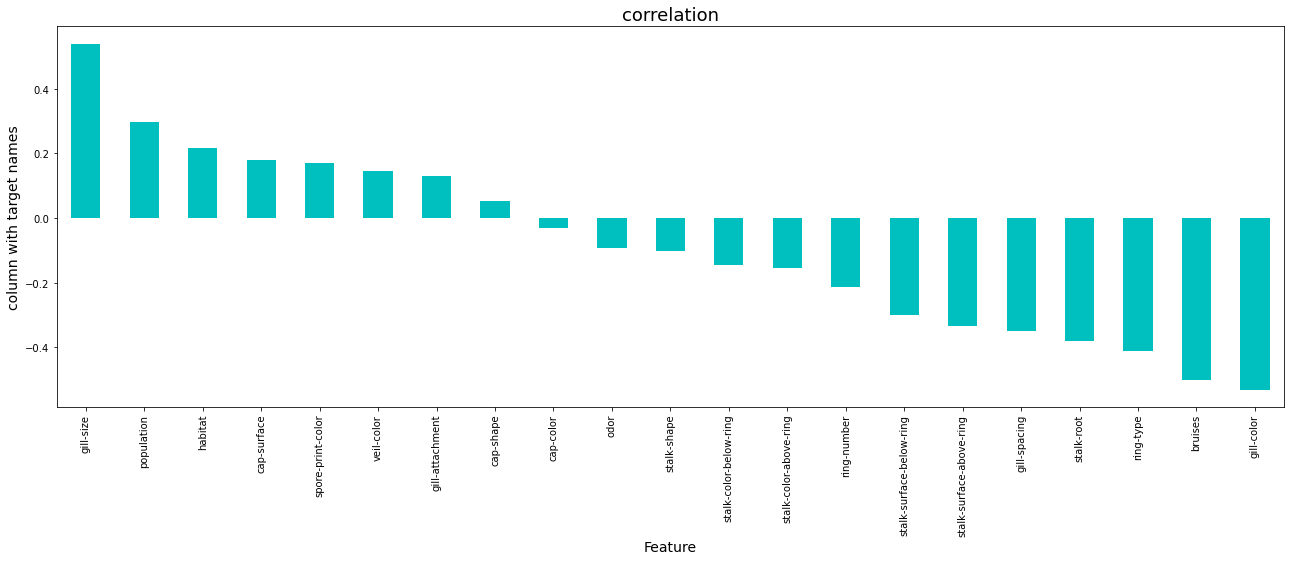

In [94]:
plt.figure(figsize=(22,7))
df.corr()['class'].sort_values(ascending=False).drop(['class']).plot(kind='bar', color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('correlation', fontsize=18)
plt.show()

From, the above correlation we can observe that cap colour has almost zero correlation and gill size is highly correlated.

In [95]:
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

Skewness must not be removed in categorical data

In [96]:
y = df['class']
X = df.drop(columns = ['class'])

In [148]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = 35)

In [108]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [109]:
y_pred = log_reg.predict(x_test)

In [110]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9620876415558838

In [111]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1040,   37],
       [  40,  914]])

In [112]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
false_positive = conf_mat[1][1]

In [114]:
Precision = true_positive/(true_positive+false_negative)
Precision

0.9629629629629629

In [115]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9629629629629629

In [116]:
F1_score = 2*(Recall * Precision) / (Recall + Precision)
F1_score

0.9629629629629629

#Though Precision and Recall scores are equal. I would rather go ahead with F1 score to reduce any risk

In [120]:
from sklearn.feature_selection import SelectKBest, f_classif

In [131]:
best_features = SelectKBest(score_func=f_classif, k=17)
fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
features_scores = pd.concat([df_columns, df_scores], axis=1)
features_scores.columns = ["Feature_Name", 'Score']
print(features_scores.nlargest(17,"Score"))

                Feature_Name        Score
7                  gill-size  3343.699638
8                 gill-color  3182.113373
3                    bruises  2729.509760
17                 ring-type  1658.306456
10                stalk-root  1365.372974
6               gill-spacing  1121.971850
11  stalk-surface-above-ring  1023.905195
12  stalk-surface-below-ring   796.235885
19                population   795.562987
20                   habitat   402.052614
16               ring-number   391.207281
1                cap-surface   267.135405
18         spore-print-color   247.490664
13    stalk-color-above-ring   197.307684
14    stalk-color-below-ring   178.712480
15                veil-color   174.780658
5            gill-attachment   137.878886


In [ ]:
From the above feature engineering technique, I select k=17

In [132]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = 35)

In [136]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [137]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[1077,    0],
       [   0,  954]])

False positive and false negative are zero, which is very good

In [143]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1077
           1       1.00      1.00      1.00       954

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



f1 score is 100 %, which means our model is a good model. But there is a chance of overfitting also.

In [150]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [157]:
cross_val_score(knn, X_scaled, y, cv=5)
cross_val_score(KNeighborsClassifier(), X_scaled, y, cv=5).mean()

0.8797053429329292

In [159]:
from sklearn.ensemble import BaggingClassifier

In [161]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                           n_estimators=10, max_samples=0.5,
                           bootstrap=True, random_state=3, oob_score=True)

In [162]:
bag_knn.oob_score

True

In [163]:
bag_knn.fit(x_train, y_train)
bag_knn.score(x_test, y_test)

0.9980305268340719

The score increased significantly using BaggingClassifier

In [165]:
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size = 0.25,random_state = 85)

In [166]:
clf = RandomForestClassifier()

params = {'n_estimators': [13,15],
         'criterion': ['entropy'],
         'max_depth':  [10,15],
         'min_samples_split': [10,11],
         'min_samples_leaf': [5,6]
         }

grd = GridSearchCV(clf,param_grid = params)
grd.fit(x_train,y_train)
print('best_params =>', grd.best_params_)
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_conf_mat = confusion_matrix(y_test,y_pred)
print(rf_conf_mat)
print(y_test,y_pred)

best_params => {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}
[[1041    0]
 [   0  990]]
520     0
3607    1
4571    1
3205    1
5000    1
       ..
2981    0
239     0
7636    0
7030    1
3066    0
Name: class, Length: 2031, dtype: int64 [0 1 1 ... 0 1 0]


In [167]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       990

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [182]:
lr = LogisticRegression()
kn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [183]:
lr.fit(x_train,y_train)
kn.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [185]:
lr.score(x_train,y_train)

0.9561792220580995

In [186]:
kn.score(x_train,y_train)

1.0

In [187]:
rf.score(x_train,y_train)

1.0

Since, my RandomForest model is giving accuracy of 100%. It shows the model is performimg well.

In [188]:
import pickle
filename = 'happiness.pkl'
pickle.dump(rf, open(filename, 'wb'))